In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as m
import scipy.stats
import statsmodels.api as sm
import numpy as np

In [11]:
df=pd.read_csv("/content/boston_housing.csv")

#EXPLORATORY DATA ANALYSIS

In [12]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [13]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [16]:
bins=[20,35,70,100]
labels = ['<35', '35-70', '70+']

df['Age Group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

In [17]:
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,35-70
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,70+
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,35-70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,35-70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,35-70
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,35-70
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,35-70
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,70+
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,70+
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,70+


#DATA VISUALIZATION TASKS

Text(0.5, 1.0, 'Median value of owner-occupied homes')

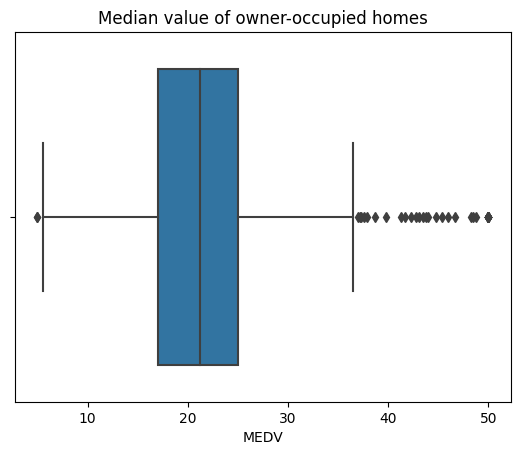

In [19]:
a=sn.boxplot(x="MEDV",data=df)
m.title("Median value of owner-occupied homes")

Text(0.5, 1.0, 'Box Plot by categorizing age groups')

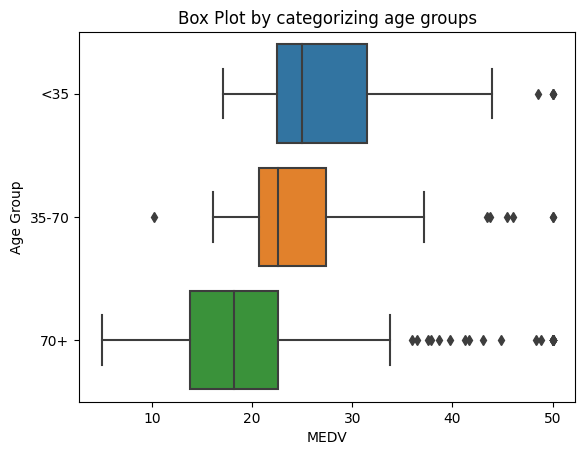

In [20]:
age_grp=sn.boxplot(x="MEDV",y="Age Group",data=df)
m.title("Box Plot by categorizing age groups")

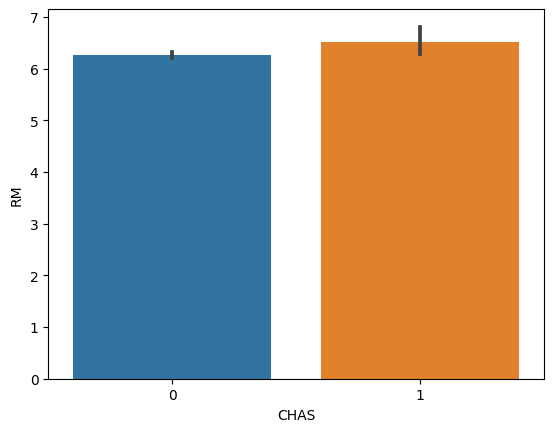

In [15]:
charles_river=sn.barplot(x="CHAS",y="RM",data=df)

Text(0.5, 1.0, 'Scatter Plot on NOX vs INDUS')

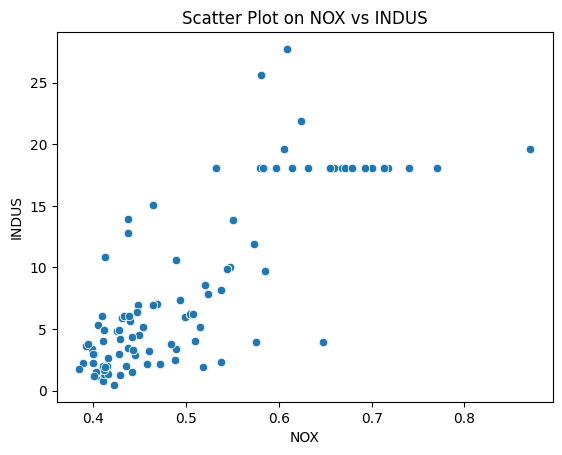

In [21]:
nitric=sn.scatterplot(x="NOX",y="INDUS",data=df)
m.title("Scatter Plot on NOX vs INDUS")

<ipython-input-23-e4d806729a8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(a=df.PTRATIO,bins=10, kde=False)


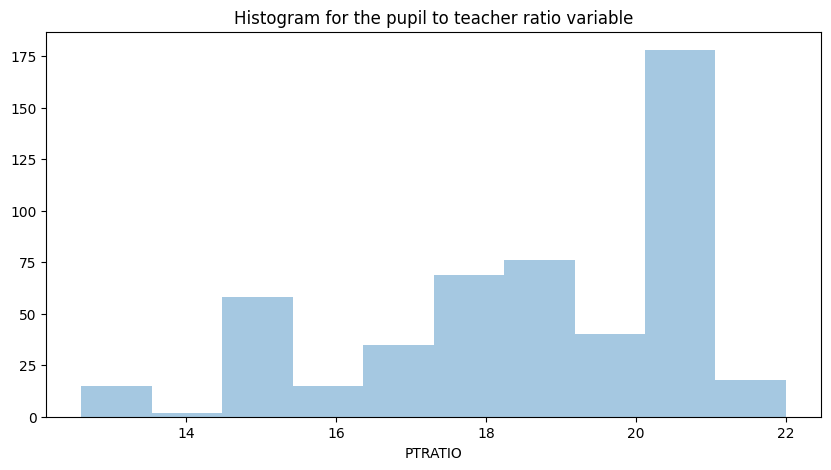

In [23]:
m.figure(figsize=(10,5))
sn.distplot(a=df.PTRATIO,bins=10, kde=False)
m.title("Histogram for the pupil to teacher ratio variable")
m.show()

#STATISTICAL ANALYSIS

In [24]:
a = df[df["CHAS"] == 0]["MEDV"]
b = df[df["CHAS"] == 1]["MEDV"]


In [25]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.**

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [26]:
low = df[df["Age Group"] == '<35']["MEDV"]
mid = df[df["Age Group"] == '35-70']["MEDV"]
high = df[df["Age Group"] == '70+']["MEDV"]

In [27]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=29.67621052108276, P-value=7.3185246915873e-13


**Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.**

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
State the hypothesis


*H0*: NOX is not correlated with INDUS

*H1*: NOX is correlated with INDUS

In [28]:
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061239527e-98


**Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.**

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
State Hypothesis

Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value

In [31]:
y = df['MEDV']
x = df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        13:58:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
np.sqrt(0.062)

0.24899799195977465

**The square root of R-squared is 0.25, which implies weak correlation between both features**

<ipython-input-37-44a84710b870>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)


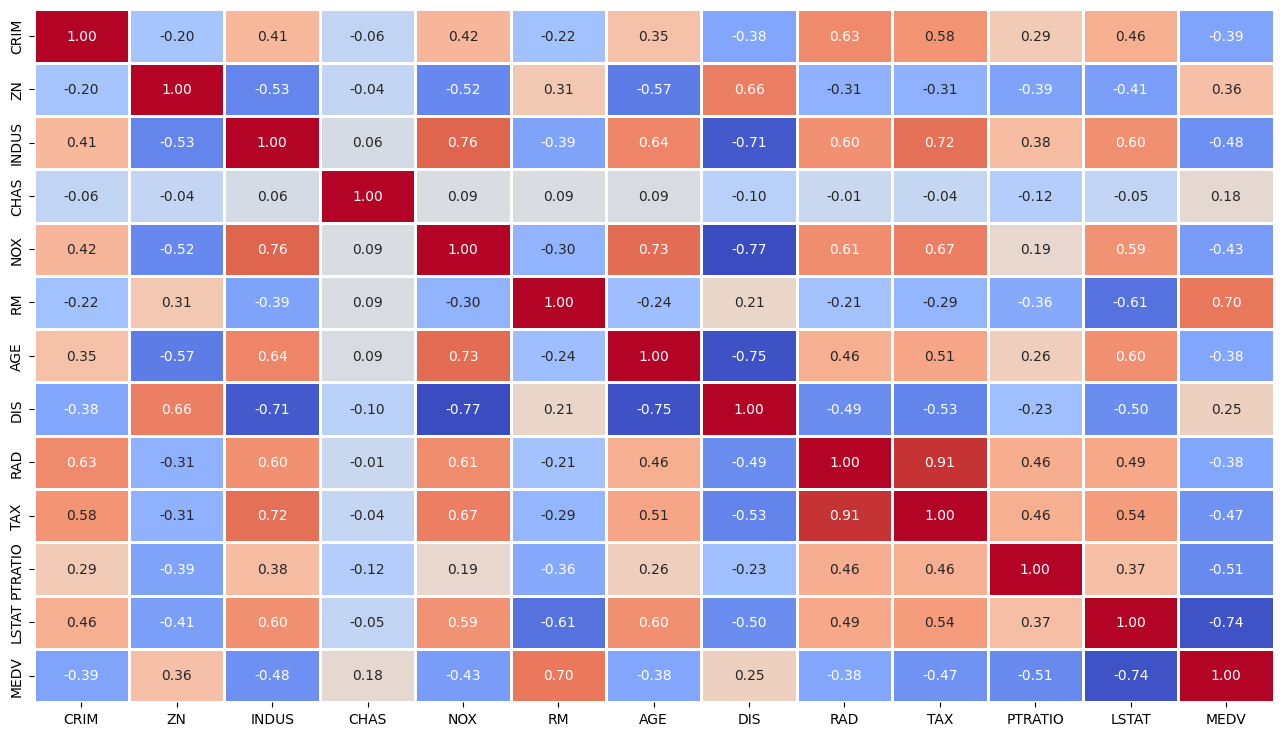

In [37]:
m.figure(figsize=(16,9))
sn.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
m.show()

#**AUTHOR**

##**RAGHU V**